## It's Sunday, the 12th of September, 2021. 

![Aerial photo of the Autodromo Nazionale Monza](images/autodromo-aerial-photo.jpg)

### We're at the *Autodromo Nazionale Monza* (or "Monza" for short), just north of Milan, Italy for the Formula 1 Italian Grand Prix.

It's already been an eventful weekend: 23-year-old <font color=#0600ef>**Red Bull**</font> prodigy Max Verstappen entered the paddock having taken the lead of the World Driver's Championship (WDC) standings from reigning and 7-time WDC champion and <font color=#00d2be>**Mercedes**</font> lead driver Lewis Hamilton. Verstappen did this in style, winning his home race at the Dutch Grand Prix in Zandvoort, Netherlands a week ago by over 20 seconds - an eternity in a sport usually measured in milliseconds. 

![Max Verstappen on track at the 2021 Dutch Grand Prix just after winning](images/Fans-celebrate-Max-Verstappens-Dutch-GP-win-planetF1.jpg)

Verstappen and Hamilton's championship fight will eventually go right down to the wire, being decided in controversial fashion on the last lap of the last race of this season...

![Verstappen versus Hamilton on the last lap of Abu Dhabi 2021](images/Max-Verstappen-overtakes-Lewis-Hamilton-for-the-2021-F1-championship.jpg.webp)

...but that's a story for another time. We're here to talk about these guys.

![Ricciardo and Norris racing on space hoppers](images/lando-and-daniel.jpg)

Don't get me wrong, Daniel Ricciardo (left, 32) and Lando Norris (right, 21) are both great drivers. Daniel has 7 race wins to his name and managed to best a young Verstappen in their first 2 seasons together at Red Bull - Lando is a promising young talent with a stellar career in the junior series. But in the perpetual technological arms race that is modern Formula 1, a driver can only do what their machinery allows them to do. That's bad news for Daniel and Lando because their team, <font color=#ff8700>**McLaren**</font>, is no longer at the top of the pile. They may be the second-oldest active team and have the second-best all-time record (both after their eternal rivals <font color=#dc0000>**Ferrari**</font>), but this sport is completely devoid of sentiment and teams nearly as old and successful as McLaren have fallen into ignominy or even dissolved completely after droughts of success.

This season, McLaren's intent is to capitalize on a rare Ferrari off year and usurp their oldest rivals for 3rd place in the World Constructor's Championship (WCC). So far, it isn't going that well. After both Ferrari drivers finished well last week at Zandvoort, McLaren has lost 3rd Place and are trailing by 11.5 points.

In [100]:
# Let's import the libraries we'll be using:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np
import pandas as pd

import requests

In [101]:
# Next, we'll enable fastf1's data cache - the library and its API calls move quite a bit of data:

ff1.Cache.enable_cache('cache') 

In [102]:
# Now we'll pull down the team (or "Constructor") standings prior to the Monza race:
# I swear this works when the site hosting it is reachable, but if it doesn't when you run this, 
# I've included a copy of the df it returns as "backupStandings.csv"

def get_constructor_standings():
    url = "https://ergast.com/api/f1/2021/13/constructorStandings.json"
    response = requests.get(url)
    data = response.json()
    drivers_standings = data['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']  # noqa: E501
    return drivers_standings

constructor_standings = get_constructor_standings()

standings_df = pd.json_normalize(constructor_standings)
standings_df['points'] = standings_df['points'].astype(float)

In [103]:
# We'll go ahead and create variables for our mentioned teams' colors
rb_color = ff1.plotting.team_color('Red Bull')
mer_color = ff1.plotting.team_color('Mercedes')
fer_color = ff1.plotting.team_color('Ferrari')
mcl_color = ff1.plotting.team_color('McLaren')

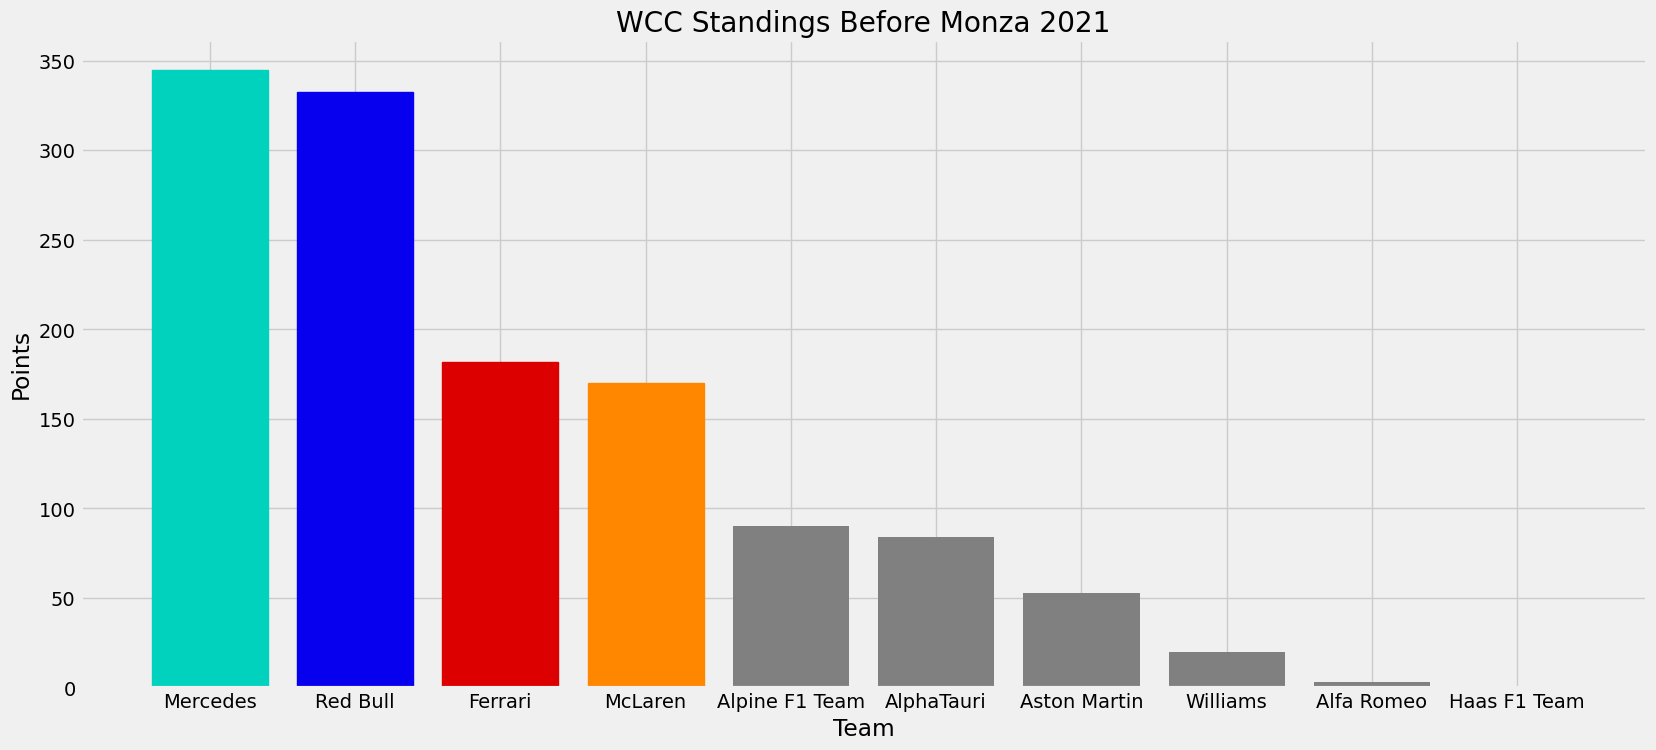

In [111]:
# fig, ax1 = plt.subplots()
# plt.rcParams['figure.figsize'] = [16, 12]
# ax1.bar(con_stan_df['Constructor.name'], con_stan_df['points'].astype(float))

plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 8))
bars = plt.bar(standings_df['Constructor.name'], standings_df['points'], linewidth = 1, color = 'grey')
# bars = plt.bar(standings_df['Constructor.name'], standings_df['points'], linewidth = 1)
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('WCC Standings Before Monza 2021')
# bars[2].set_color(fastf1.plotting.team_color(con_stan_df['Constructor.name'].iloc[2]))
bars[0].set_color(mer_color)
bars[1].set_color(rb_color)
bars[2].set_color(fer_color)
bars[3].set_color(mcl_color)

Monza is the 14th of 22 rounds in the 2021 season, so McLaren aren't quite done for yet, but Ferrari have been the more consistent team in scoring points with both drivers (in F1, that means finishing races inside the top 10 positions). Lando is in the middle of a banner season, but Daniel, who is new to the team and car, is having difficulty adjusting. If McLaren are to hold onto 3rd in the WCC, they'll need to press their advantages whenever they can.

...uh, guys? You have an advantage in here *somewhere*, right?

In [105]:
# Set and pull Monza qualifying session data

year, grand_prix, session = 2021, 'Monza', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '3', '10', '55', '16', '11', '99', '5', '18', '14', '31', '63', '6', '22', '47', '88', '9']


In [106]:
# Get fastest speed trap measurement for each driver during qualifying

top_speeds = quali.laps[['Driver', 'Team', 'SpeedST']].groupby(['Driver']).max().sort_values('SpeedST', ascending=False)

In [107]:
# Give the top_speeds list a good shake and create the list of colors we need to chart it

top_speeds = top_speeds.reset_index()

team_colors = list()
for index, speed in top_speeds.iterlaps():
    color = ff1.plotting.team_color(speed['Team'])
    team_colors.append(color)

Text(0.5, 1.0, 'Monza 2021 Qualifying: Top Speeds')

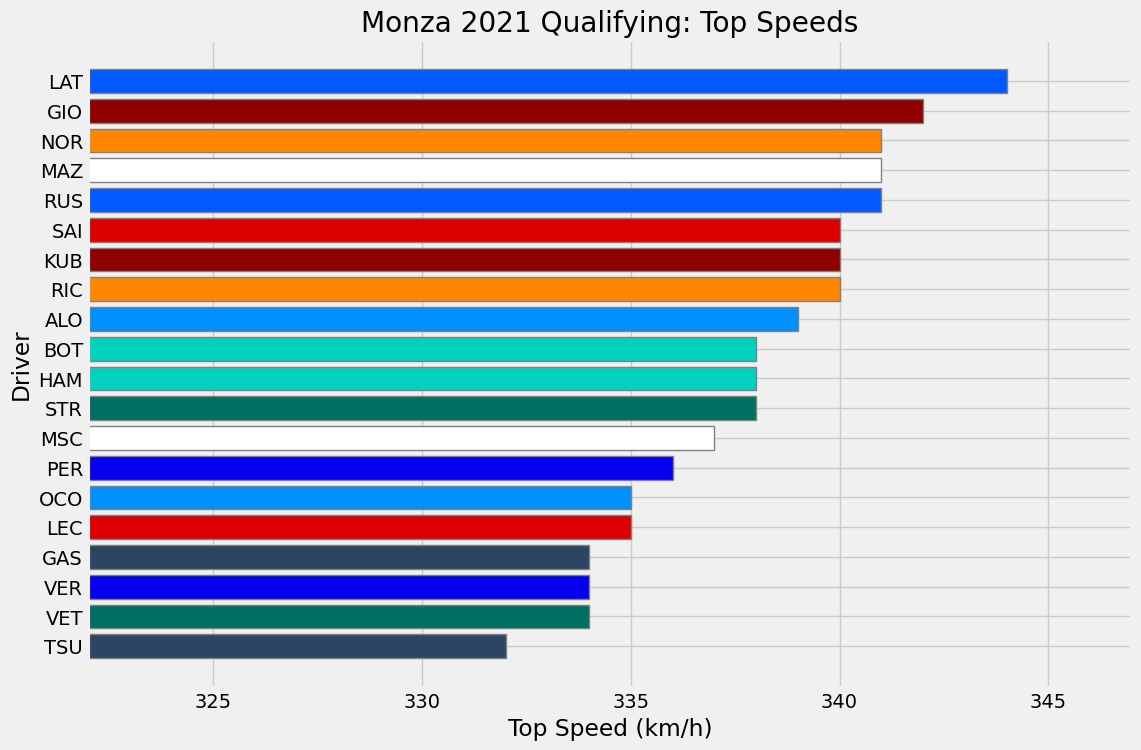

In [110]:
# Create the chart

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
ax.barh(top_speeds.index, top_speeds['SpeedST'],
        color=team_colors, edgecolor='grey', linewidth = 1)
ax.set_yticks(top_speeds.index)
ax.set_yticklabels(top_speeds['Driver'])
ax.invert_yaxis()
ax.set_xlim(322, 347)
ax.set_xlabel('Top Speed (km/h)')
ax.set_ylabel('Driver')

plt.title('Monza 2021 Qualifying: Top Speeds')

Ah, here's something we can work with. 

For the uninitiated, F1 cars are fast, but probably not in the way you're thinking. As you can see above, at Monza they can reach straight-line speeds nearing 350 km/h (around 215 mph), but IndyCar, uh, cars on oval tracks reach up to 380 km/h (around 236 mph). No, what makes F1 cars so uniquely fast is their **downforce** and the resulting speed they can carry through turns, or "corners" in F1 parlance. You'll notice that Verstappen, one of the two contenders for the WDC, is shown here with the *3rd-slowest* top speed. But he'll still start the race from pole position because these cars only start to really work when they turn and the inverted wings all over them push them down into the surface of the track, *literally* creating grip out of thin air.

With all that said, you might expect that Lando and Daniel registering near the top of the speed trap here is a neat bit of trivia to brag about, but not actually helpful for winning races. At other tracks, you might even be right. But Monza is not a normal F1 track. It's the fastest circuit on the calendar, nicknamed "The Temple of Speed" by drivers, which means it's the kind of place where a car that's decent in the corners and slippery in a straight line can cause some trouble.

Lando and Daniel are *near* the top of this list, though, not *at* the top. If straight line speed is going to be their decisive advantage, they'll need to at least start ahead of the cars with higher top speeds than them.

![Alt text](images/Monza2021Grid.png)

...huh. How about that.

In [124]:
# Now it's time to import our Monza *race* data from the fastf1 cache:

year, grand_prix, session = 2021, 'Monza', 'R'

race = ff1.get_session(year, grand_prix, session)
race.load()

session     WARNING 	Request for URL https://raw.githubusercontent.com/theOehrly/f1schedule/master/schedule_2021.json failed; using cached response
Traceback (most recent call last):
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/http/client.py", line 1377, in getresponse
    response.begin()
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/http/client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "/Users/jddannunzio/opt/anacon

In [126]:
# Next, we'll specify the drivers we care about: Ricciardo, Norris, Hamilton, and Verstappen
driver_1, driver_2, driver_3, driver_4 = 'RIC', 'NOR', 'HAM', 'VER'

# Next, we need to convert our drivers' laptimes from the `timedelta` datatype into floats so that we can chart them. 
race.laps['LapTimeSeconds'] = race.laps['LapTime'].dt.total_seconds()

# We'll also trim the in- and out-laps from our dataframe as they skew the overall pace.
laps = race.laps.loc[(race.laps['PitOutTime'].isnull() & race.laps['PitInTime'].isnull())]

In [127]:
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)
laps_driver_3 = race.laps.pick_driver(driver_3)
laps_driver_4 = race.laps.pick_driver(driver_4)

drivers_to_visualize = ['RIC', 'NOR', 'HAM', 'VER']
visualized_teams = []

In [53]:
# Trying to programatically extract safety car laps to highlight x ranges with non-representative laptimes
# sc_laps = laps_driver_1.loc[laps_driver_1['TrackStatus']] == '4'
# sc_laps_1 = laps_driver_1.pick_track_status('4', how="contains")
# sc_laps_2 = laps_driver_1.pick_track_status('6', how='contains')

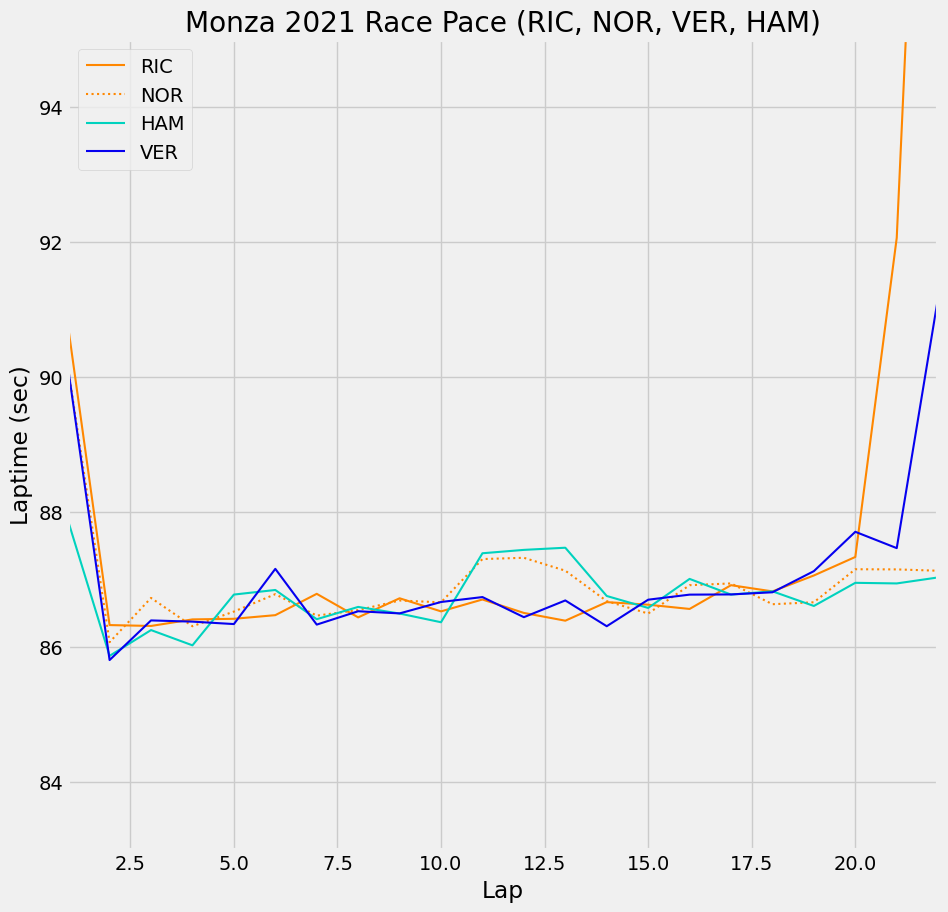

In [133]:
visualized_teams = []

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()

for driver in drivers_to_visualize:
    driver_laps = race.laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Get their team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # The formation lap is counted as "Lap 1" in the data, so we subtract it from the count
    x = driver_laps['LapNumber'] - 1

    # Create a rolling average of laptimes
    # y = driver_laps['LapTimeSeconds'].rolling(3, center=True).mean()
    y = driver_laps['LapTimeSeconds']
    
    # To ensure teammates' lines are distinct
    linestyle = '-' if team not in visualized_teams else ':'
    
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=1.5)
    ax.set(ylabel = 'Laptime (sec)')
    ax.set(xlabel = 'Lap')
    ax.set_xlim(1, 22)
    ax.set_ylim(83, 95)
    ax.set_title('Monza 2021 Race Pace (RIC, NOR, VER, HAM)')
    ax.legend()
    
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)

sc_yellow = '#ffca00'

# Highlight Safety Car & Virtual Safety Car laps in F1's Safety Car Yellow
# Could definitely do this programmatically. Outer values of consecutive runs? axvspan method can only take beginning and ending lap numbers
ax.axvspan(24, 30, color=sc_yellow, alpha=0.3)
ax.axvspan(43, 44, color=sc_yellow, alpha=0.3)


Alright, enough teasing, let's start this race. Daniel gets a great start and passes Verstappen into the first corner to take P1. Hamilton passes Lando but is forced off track by Verstappen, which slows him enough for Lando to get back past. The gaps between them contract, expand, contract again. Verstappen nearly gets close enough to try and make a move on Daniel, but loses grip as he enters the region of dirty air behind Daniel and has to back off. Hamilton very nearly gets a run on Lando and moves to pass him, first into Turn 1, then again into Turn 4, but Lando brakes later and holds the position. It's a very close pair of races, but in both cases, the McLaren drivers are managing to fend off the WDC leaders in the two fastest cars on the grid. This is going to come down to the pitstops.

![Alt text](images/RBPitStop.jpg)

In each F1 race, each driver is required to stop and change tires at least once. A Formula 1 pit stop is an intricate, choreographed dance between 20 or so mechanics that takes, if all goes to plan, less than 3 seconds to complete. A great stop can seal a victory in exactly the way that a terrible one can ruin it. And because the pit lane at each track has a speed limit, each stop will cost a driver between 20 and 30 seconds of race time, not including the stop itself. Because of this, teams prefer to stop only once per race - this minimizes both the amount of time their driver must make up on track and the chance of a costly error during the stop. 

All of this is to say that if you're Max Verstappen, running close behind Daniel but not close enough to make the pass, or Lewis Hamilton, not quite able to get the move done on Lando, you like your odds of getting ahead during the pit phase. After all, your team is famous for their stops.

![Alt text](images/DHLFastestPit.jpg)

...and if you're Daniel or Lando, you're crossing your fingers in between each of the 40 or 50 gear changes you're pulling every lap. McLaren are decidedly *not* famous for their pit work. Nevertheless, you've got to stop sometime, and logistics usually dictate the lead driver comes in first, so on Lap 23, Daniel does.

He's stationary for 2.4 seconds and in the pitlane for 23.8 total, an excellent stop by McLaren's standards. Verstappen and Red Bull are forced to try and make the overcut work, hoping they can wring more pace out of their old tires than Daniel can out of his new set, stop on the next lap, and emerge in front. A little over a minute later, Verstappen dives into the pitlane, and...

It's a *disaster*. A problem with one of the wheel guns leaves him stationary for 11.1 seconds, Red Bull's longest stop of the season by a mile. By the time Verstappen drives back onto the main straight, he's been off the track for 32.5 seconds. He's got a *lot* of time to make up.

In [123]:
ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=1.5)
    ax.set(ylabel = 'Laptime (sec)')
    ax.set(xlabel = 'Lap')
    ax.set_xlim(11, 24)
    ax.set_ylim(83, 115)
    ax.set_title('Monza 2021 Race Pace (RIC, NOR, VER, HAM)')
    ax.legend()

IndentationError: unexpected indent (2292969615.py, line 2)